In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats


In [ ]:
#READS IN FILE
oyster_data = pd.read_csv('bop_data.csv')

In [ ]:
oyster_data.columns

Index(['Site', 'Date', 'live_dead', 'shell_height_mm', 'total_live', 'sample',
       'time', 'latitude', 'longitude', 'depth_m', 'pH', 'cond_mScm',
       'turb_NTU', 'TDS_gL', 'temp_C', 'sal_ppt', 'DO_mgL'],
      dtype='object')

In [ ]:
#RENAMES 2 COLUMNS
#inplace-
oyster_data.rename(columns = {'Date' : 'date', 'Site' : 'site'}, inplace= True)

In [ ]:
oyster_data.columns

Index(['site', 'date', 'live_dead', 'shell_height_mm', 'total_live', 'sample',
       'time', 'latitude', 'longitude', 'depth_m', 'pH', 'cond_mScm',
       'turb_NTU', 'TDS_gL', 'temp_C', 'sal_ppt', 'DO_mgL'],
      dtype='object')

In [ ]:
#GET (ROWS, COLUMNS) #
oyster_data.shape

(20039, 17)

In [ ]:
#identifies the sites, no repeats
oyster_data['site'].unique()

array(['Bush Terminal Park', 'Brooklyn Bridge Park', 'Coney Island Creek',
       'Lemon Creek Lagoon', 'Paerdegat Basin', "Governor's Island",
       'Lemon Creek Nursery', 'Great Kills Harbor', 'Brooklyn Navy Yard'],
      dtype=object)

In [ ]:
# head() returns the first 5 rows, tail() returns last 5 rows
# NaN: empty data
oyster_data.head()

,site,date,live_dead,shell_height_mm,total_live,sample,time,latitude,longitude,depth_m,pH,cond_mScm,turb_NTU,TDS_gL,temp_C,sal_ppt,DO_mgL
0,Bush Terminal Park,2016-07-20,NaN,12.0,NaN,A,2:14:00 PM,40.653736,-74.018760,0.0,8.64,37.4,16.0,NaN,27.40,23.8,12.15
1,Bush Terminal Park,2016-07-20,NaN,12.0,NaN,B,2:22:00 PM,40.654206,-74.019517,0.0,8.21,37.8,12.0,23.1,25.52,24.0,8.26
2,Bush Terminal Park,2016-07-20,NaN,12.0,NaN,C,2:26:00 PM,40.654473,-74.019106,1.0,8.35,38.3,8.9,23.4,25.27,24.3,9.19
3,Bush Terminal Park,2016-07-20,NaN,12.0,NaN,D,2:30:00 PM,40.654269,-74.018720,1.0,8.69,38.6,14.1,23.5,26.89,24.5,11.99
4,Bush Terminal Park,2016-07-20,NaN,12.0,NaN,E,2:36:00 PM,40.654438,-74.018495,0.0,7.92,39.1,10.4,23.9,24.66,24.9,7.53


In [ ]:
#explore shell height column
oyster_data['shell_height_mm'].unique()


array([ 12.,  11.,  13.,  15.,  16.,   5.,   4.,   9.,  10.,  14.,   6.,
         8.,   7.,   3.,   2.,  17.,  18.,  19.,  20.,   1.,  22.,  33.,
        42.,  34.,  28.,  36.,  26.,  31.,  29.,  24.,  21.,  27.,  25.,
        40.,  30.,  35.,  38.,  23.,  32.,  41.,  37.,  54.,  53.,  45.,
        56.,  57.,  58.,  46.,  48.,  62.,  55.,  43.,  44.,  51.,  47.,
        52.,  69.,  39.,  49.,  71.,  67.,  64.,  59.,  50.,  65.,  63.,
        60.,   0.,  74.,  61.,  70.,  87.,  76.,  79.,  92., 111.,  75.,
        82.,  86.,  96., 118.,  72.,  80., 101.,  89., 100., 125.,  85.,
        68.,  90.,  88.,  94.,  84.,  73.,  95.,  83.,  66.,  77., 106.,
        98.,  78.,  nan, 110.,  81., 121.,  97., 115., 120., 102., 160.,
       129.,  91., 130., 154., 104., 108., 113., 105., 103., 145.,  93.,
       116., 114., 117., 112., 137., 148., 109., 140., 126., 128.,  99.,
       119., 132., 134., 136., 135., 127., 141., 122., 153., 150., 133.,
       124., 143., 107., 131., 123., 149., 151., 14

In [ ]:
oyster_data['shell_height_mm'].describe()

count    19691.000000
mean        29.966888
std         28.274550
min          0.000000
25%          9.000000
50%         19.000000
75%         42.000000
max        160.000000
Name: shell_height_mm, dtype: float64

In [ ]:
#counts the occurrences of each unique value in a column
oyster_data['shell_height_mm'].value_counts()

shell_height_mm
9.0      950
11.0     911
8.0      824
10.0     817
7.0      764
        ... 
123.0      3
149.0      3
151.0      3
160.0      1
154.0      1
Name: count, Length: 150, dtype: int64

In [ ]:
#how many NaN are there in the shell height column
oyster_data['shell_height_mm'].isna().sum()

348

In [ ]:
# Filter out 0 values before finding min and max
heights_excluding_zero = oyster_data[oyster_data['shell_height_mm'] != 0]['shell_height_mm']

# Find the range of oyster heights excluding 0
min_height = heights_excluding_zero.min()
max_height = heights_excluding_zero.max()

print("Minimum shell height (excluding 0):", min_height, "mm")
print("Maximum shell height (excluding 0):", max_height, "mm")

Minimum shell height (excluding 0): 1.0 mm
Maximum shell height (excluding 0): 160.0 mm


In [ ]:
#find the number of 1mm oysters
count_1mm_oysters = (oyster_data['shell_height_mm'] == 1).sum()
print("Number of 1mm oysters:", count_1mm_oysters)

Number of 1mm oysters: 204


In [ ]:
#keeping two columns only
oyster_data = oyster_data [['site', 'shell_height_mm']]

In [ ]:
#removing all rows with NaN values for shell_height_mm and site
oyster_data = oyster_data.dropna()

In [ ]:
oyster_data.shape

(19691, 2)

In [ ]:
#average size of the oysters in a particular place
oyster_data.groupby('site').mean()['shell_height_mm']

site
Brooklyn Bridge Park    24.625000
Brooklyn Navy Yard      39.439791
Bush Terminal Park      13.740504
Coney Island Creek      47.135714
Governor's Island       41.259740
Great Kills Harbor      60.606921
Lemon Creek Lagoon      28.465971
Lemon Creek Nursery     43.994023
Paerdegat Basin         52.285714
Name: shell_height_mm, dtype: float64

Text(0, 0.5, 'y-axis')

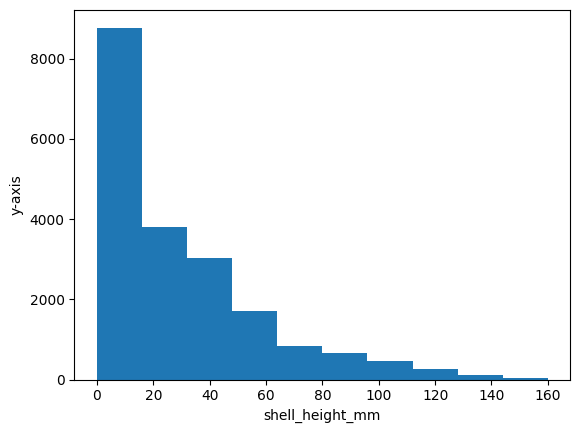

In [ ]:
oyster_data['shell_height_mm'].plot.hist()
plt.xlabel('shell_height_mm')
plt.ylabel('y-axis')

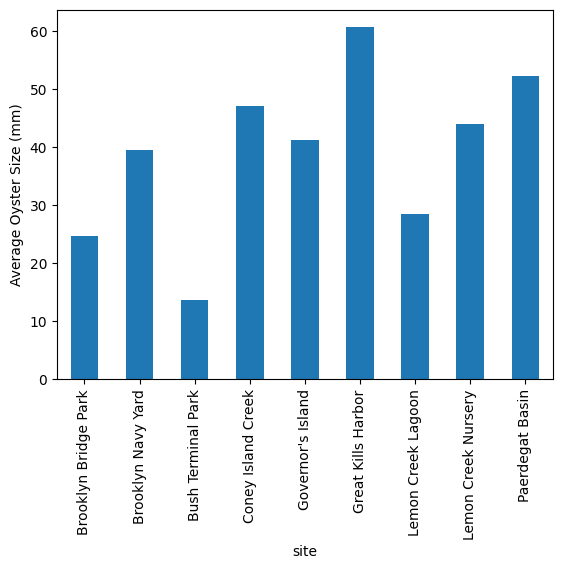

In [ ]:
#bar plot showing the mean of the group
oyster_data.groupby('site').mean()['shell_height_mm'].plot.bar()
plt.ylabel('Average Oyster Size (mm)');